## PyTorch API  
<table class="tfo-notebook-buttons" align="right" style="margin-top:-55px">
<td>
      <a target="_blank" href="https://pytorch.org/docs/stable/torch.html"><CNTER> <img src="https://pytorch.org/assets/images/logo.svg"  width="100" /><p style='margin-left:12px'></p></CENTER></a>
  </td>
 </table>

In [ ]:
!git clone https://github.com/FawadAbbas12/AI_101_Workshop -b day3
%cd AI_101_Workshop 

## Pytorch Modules

### Model Architecture

In [2]:
from IPython.display import Video
Video('res/vids/NeuralArchitecture3.mp4', embed=True, width=700)

### Linear Neural Network Perceptron

The linear layer is not just a good starting example: it is the fundmental workhorse of all neural networks, so as simple as it is, it is worth examining carefully.

`torch.nn.Linear` implements the function `y = Ax + b`, which takes m-dimensional input `x` and produces n-dimensional output `y`, by multiplying by the n &times; m matrix `A` (whose specific values are called the `weight`) and adding n-dimensional vector `b` (whose values are called the `bias`).  We can make a Linear network with 3d input and 2d output just like this:

In [11]:
import torch
net = torch.nn.Linear(3, 3)
print(net)

Linear(in_features=3, out_features=3, bias=True)


### Custom Multi Layer Model

In [1]:
from torch import nn
from torch.nn import functional as F
class MODEL(nn.Module):
    def __init__(self,in_size=1, out_size=1) -> None:
        super().__init__()
        # X_IN
        self.Input_layer = torch.nn.Linear(in_size, 12)
        # H_1
        self.First_hidden_layer = torch.nn.Linear(12, 32)
        # H_2
        self.Second_hidden_layer = torch.nn.Linear(32, 12)
        # Y_OUT
        self.Output_layer = torch.nn.Linear(12, out_size)
    
    def forward(self, input):
        ####################################
        ## Extract Features from First Layer
        ## X => X_IN
        input_features = self.Input_layer(
                            input
                        )
        non_linear_features = F.relu(input_features)
        
        # X_IN => H_1 
        features_1 = self.First_hidden_layer(
                        non_linear_features
                    )
        non_linear_features = F.relu(features_1)
        
        # H_1 => H_2
        features_2 = self.Second_hidden_layer(
                        non_linear_features
                    )
        non_linear_features = F.relu(features_2)
        
        # H_2 => Y_OUT
        output_features = self.Output_layer(
                        non_linear_features
                    )
        return output_features

##### Effect Of Non linear features

In [3]:
from IPython.display import Video
Video('res/vids/Relu_and_CombiningNeurons.mp4', embed=True, width=700)

#### Model Training 

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import torch
from torch import optim
import numpy as np
from IPython import display
class Learn_Function_Boudary():
    def __init__(self, in_size=2, out_size=2, classify_target_fn=lambda x,y:(y > (x).sin()).long()):
        self.net = MODEL(in_size, out_size).to(0)        
        self.criteron = nn.CrossEntropyLoss()
        self.classify_target = classify_target_fn
        self.hdisplay = display.display("", display_id=True)
    
    def visualize_net(self, fig, ax1, ax2, lable, redraw=False):
        grid = torch.stack([
            torch.linspace(-2, 2, 100)[None, :].expand(100, 100),
            torch.linspace(2, -2, 100)[:, None].expand(100, 100),
        ])
        x, y = grid
        target = self.classify_target(x, y)
        ax1.set_title(f'{lable} target')
        ax1.imshow(target.float(), cmap='hot', extent=[-2,2,-2,2])
        ax2.set_title(f'{lable} network output')
        score = self.net(grid.permute(1, 2, 0).reshape(-1, 2).cuda()).softmax(1)
        ax2.imshow(score[:,1].reshape(100, 100).detach().cpu(), cmap='hot', extent=[-2,2,-2,2])
        plt.show()
        
    def train( 
                self,
                epochs = 10,
                lr = 0.005,
                batch_size = 20,
                sched_step=300,
                num_samples=2000
            ):

            # Load Dataset
            x_data = torch.randn(10000, 2, device='cuda')
            y_data = self.classify_target(x_data[:,0], x_data[:,1])
            optimizer = optim.Adam(self.net.parameters(), lr=lr)    
            # criteron = lambda x, y: torch.mean(torch.abs(x - y))
            
            scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=sched_step, gamma=0.5)
            fig, (ax1, ax2) = plt.subplots(1, 2)
            # Start the training process
            for epoch in range(epochs):
                batches = np.array_split(np.random.permutation(num_samples), batch_size)
                running_loss = 0
                for i, indices in enumerate(batches):
                    # Get Batch data
                    inputs = x_data[indices]
                    labels = y_data[indices]

                    # Forward pass
                    outputs = self.net(inputs)
                    
                    # compute average absolute difference between outputs and labels
                    loss = self.criteron(outputs, labels)
                    
                    # Backward pass and optimization
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()
                    running_loss += loss.item()
                if epoch == 2 ** epoch.bit_length() - 1 and epoch != 0:
                    fig_new, (ax1_new, ax2_new) = plt.subplots(1, 2)
                    self.visualize_net(
                        fig_new, ax1_new, ax2_new, f'Epoch {epoch} '
                    )
                    print('Epoch: {}, Loss: {:.10f}'.format(epoch, running_loss))
                # Report Output
                scheduler.step()



In [ ]:
def classify_target(x, y):
    return (y > (x).tan()).long()

trainer = Learn_Function_Boudary(
    in_size=2, out_size=2,
    classify_target_fn= classify_target
)
trainer.train(1024)


### Save Model

In [12]:
trainer.net.state_dict()
# trainer.net.state_dict()['Output_layer.weight']

OrderedDict([('Input_layer.weight',
              tensor([[ 0.5897,  0.5210],
                      [-1.0692,  1.1050],
                      [ 0.5826, -0.0235],
                      [-0.9829,  0.7093],
                      [-0.4149, -0.7844],
                      [ 1.2539,  0.2572],
                      [ 1.1695, -0.7772],
                      [-0.0900,  0.7850],
                      [ 0.0259,  0.0862],
                      [-0.1766, -1.0552],
                      [ 1.1009, -0.7854],
                      [-0.9762, -0.3895]], device='cuda:0')),
             ('Input_layer.bias',
              tensor([-1.0531,  0.1497,  1.1448,  0.1157, -0.8415, -0.6481,  0.1588, -1.0083,
                       1.0886,  0.7502,  0.1387, -0.4556], device='cuda:0')),
             ('First_hidden_layer.weight',
              tensor([[-1.6741e+00,  2.4323e-01,  1.5600e-01,  6.6235e-02, -4.1870e+00,
                       -8.0738e-01, -1.0381e+00, -2.9278e-01,  1.8466e-01, -2.8517e-01,
               

In [14]:

save_path = 'res/model_zoo/saved_model.pt'
torch.save(
    trainer.net.state_dict(), # model's weights 
    save_path
)

### Load Model 

In [15]:
ckpt = torch.load(
    save_path,
    map_location='cpu'
)
print(ckpt.keys())

odict_keys(['Input_layer.weight', 'Input_layer.bias', 'First_hidden_layer.weight', 'First_hidden_layer.bias', 'Second_hidden_layer.weight', 'Second_hidden_layer.bias', 'Output_layer.weight', 'Output_layer.bias'])


In [16]:
net = MODEL(2, 2).to(0)  

In [17]:
net.load_state_dict(
    ckpt,
    strict=True
)

<All keys matched successfully>

### Infer 

In [18]:
def classify_target(x, y):
    return (y > (x).tan()).long()

input =  torch.randn(1, 2, device='cuda')
output = net(input).softmax(1)

In [23]:
print(
    classify_target(
        input[0][0],input[0][1]
    ).detach().cpu().numpy()
    )

print(output)

0
tensor([[1.0000e+00, 4.0563e-11]], device='cuda:0', grad_fn=<SoftmaxBackward0>)


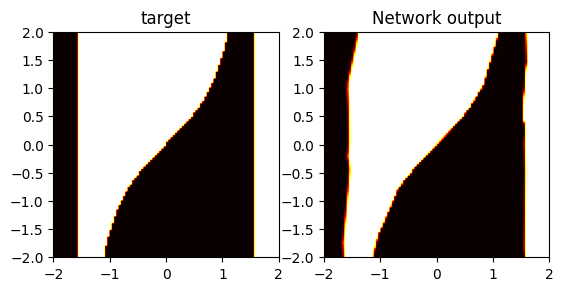

In [24]:
def visualize_net(net):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    grid = torch.stack([
        torch.linspace(-2, 2, 100)[None, :].expand(100, 100),
        torch.linspace(2, -2, 100)[:, None].expand(100, 100),
    ])
    x, y = grid
    target = classify_target(x, y)
    ax1.set_title(f'target')
    ax1.imshow(target.float(), cmap='hot', extent=[-2,2,-2,2])
    ax2.set_title(f'Network output')
    score = net(grid.permute(1, 2, 0).reshape(-1, 2).cuda()).softmax(1)
    ax2.imshow(score[:,1].reshape(100, 100).detach().cpu(), cmap='hot', extent=[-2,2,-2,2])
    plt.show() 
    
visualize_net(net)

### Train model to learn Fouries Series

#### Fouries Series 

In [3]:
from IPython.display import Video
Video('res/vids/FourierSeries.mp4', embed=True, width=700)

#### Build Model

In [5]:
import torch
from torch import nn


class SkipConn(nn.Module):
	def __init__(self, in_size=1, out_size=1, hidden_size=100, hidden_layers=7):
		super(SkipConn,self).__init__()
		end_size = hidden_size

		self.inLayer = nn.Linear(in_size, end_size)
		self.relu = nn.LeakyReLU()
		hidden = []
		for i in range(hidden_layers):
			start_size = end_size*2 + in_size if i>0 else end_size + in_size
			hidden.append(nn.Linear(start_size, end_size))
		self.hidden = nn.ModuleList(hidden)
		self.outLayer = nn.Linear(end_size*2+in_size, out_size)

	def forward(self, x):
		cur = self.relu(self.inLayer(x))
		prev = torch.tensor([])
		for layer in self.hidden:
			combined = torch.cat([cur, prev, x], 1)
			prev = cur
			cur = self.relu(layer(combined))
		return self.outLayer(torch.cat([cur, prev, x], 1))
		# return self.sig(y)


class Fourier(nn.Module):
	def __init__(self, in_size=1, out_size=1, fourier_order=4, hidden_size=100, hidden_layers=7):
		super(Fourier,self).__init__()
		self.fourier_order = fourier_order
		in_size = in_size * 2 * fourier_order + in_size
		self.inner_model = SkipConn(in_size=in_size, out_size=out_size, hidden_size=hidden_size, hidden_layers=hidden_layers)
		self.orders = torch.arange(1, fourier_order + 1).float()

	def forward(self,x):
		x = x.unsqueeze(-1)  # add an extra dimension for broadcasting
		fourier_features = torch.cat([torch.sin(self.orders * x), torch.cos(self.orders * x), x], dim=-1)
		fourier_features = fourier_features.view(x.shape[0], -1)  # flatten the last two dimensions
		return self.inner_model(fourier_features)

#### Train Model

In [4]:
from IPython.display import Video
Video('res/vids/LearnFourier.mp4', embed=True, width=700)

In [8]:
from torch import optim
import numpy as np

PI: float = np.pi

def target_function(x):
    return abs(x)/4 - abs(2+x) + abs(3*x+3)/2 - 1

class LearnFourier():
    def __init__(self, fourier_order=16, hidden_size=100, hidden_layers=7):
        self.net = Fourier(fourier_order=fourier_order, hidden_size=hidden_size, hidden_layers=hidden_layers)        
        self.criteron = nn.MSELoss()
        
    def train( self,
                    data_loader,
                    epochs = 10,
                    lr = 0.005,
                    batch_size = 20,
                    num_samples = 300,
                    x_range = [-PI, PI],
                    sched_step = 10):

            # Create the dataset
            x_data = np.random.uniform(x_range[0], x_range[1], num_samples)
            y_data = data_loader(x_data)

            optimizer = optim.Adam(self.net.parameters(), lr=lr)    
            # criteron = lambda x, y: torch.mean(torch.abs(x - y))
            
            scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=sched_step, gamma=0.5)

            # Start the training process
            for epoch in range(epochs):
                batches = np.array_split(np.random.permutation(num_samples), batch_size)
                running_loss = 0
                for i, indices in enumerate(batches):
                    # Convert 
                    inputs = torch.Tensor([[x] for x in x_data[indices]])
                    labels = torch.Tensor([[y] for y in y_data[indices]])

                    # Forward pass
                    outputs = self.net(inputs)
                    
                    # compute average absolute difference between outputs and labels
                    loss = self.criteron(outputs, labels)
                    
                    # Backward pass and optimization
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()
                    running_loss += loss.item()
                print('Epoch: {}, Loss: {:.10f}'.format(epoch, running_loss / num_samples))
                scheduler.step()


model = LearnFourier()
model.train(
    data_loader = target_function,
    epochs = 10,
    lr = 0.005,
    batch_size = 20,
    num_samples = 300,
    x_range = [-PI, PI],
    sched_step = 10
)

Epoch: 0, Loss: 0.0296627863
Epoch: 1, Loss: 0.0033525912
Epoch: 2, Loss: 0.0007007546
Epoch: 3, Loss: 0.0003119047
Epoch: 4, Loss: 0.0001730667
Epoch: 5, Loss: 0.0001800340
Epoch: 6, Loss: 0.0000963704
Epoch: 7, Loss: 0.0000967308
Epoch: 8, Loss: 0.0000438318
Epoch: 9, Loss: 0.0000386666


#### Inference

## Image Datasets and Dataloaders in pytorch

In [25]:
from IPython.display import Video
Video('res/vids/How_NN_Takes_Input.mp4', embed=True, width=700)

Data sets can be thought of as big arrays of data.  If the data set is small enough (e.g., MNIST, which has 60,000 28x28 grayscale images), a dataset can be literally represented as a single pytorch tensor.  With one number per pixel, MNIST takes about 200 megabytes of RAM, which fits comfortably into a modern computer.

But larger-scale datasets like `CAT DOG (60,000 300x300 RGB images) requiring 15 GB of RAM` or ImageNet have more than a million higher-resolution full-color images.  In these cases, an ordinary python array or pytorch tensor would require more than a terabyte of RAM, which is impractical on most computers.

Instead, we need to load the data from disk (or SSD).  Unfortunately, the latency of loading from disk is very slow compared to RAM, so we need to do the loading cleverly if we want to load the data quickly.

To solve the problem, pytorch provides two classes:
 * `torch.utils.data.Dataset` - This very simple base class represents an array where the actual data may be slow to fetch, typically because the data is in disk files that require some loading, decoding, or other preprocessing. Pytorch provides a variety of different `Dataset` subclasses.  For example, there is a handy one called `ImageFolder` that treats a directory tree of image files as an array of classified images.
 * `torch.utils.data.DataLoader` - This fancy class wraps a `Dataset` as a stream of data batches.  Behind the scenes it uses a few techniques to feed the data faster.  You do not need to subclass `DataLoader` - its purpose is to make a `Dataset` speedy.

In [4]:
import torchvision
import torch
dataset = torchvision.datasets.ImageFolder(
        'res/dataset_dir/cat_dog/train',
        torchvision.transforms.Compose([
            torchvision.transforms.RandomHorizontalFlip(),
            torchvision.transforms.RandomVerticalFlip(),
            torchvision.transforms.Resize((300,300)),
            # torchvision.transforms.RandomCrop(112),
            # torchvision.transforms.Grayscale(),
            # torchvision.transforms.ToTensor(),
            # torchvision.transforms.Normalize(
            #         mean=[0.449],
            #         std=[0.226]
            #     ),
        ])
    )
print('Length is', len(dataset))
image_means = torch.stack([t.mean(1).mean(1) for t, c in dataset])
images_mean = image_means.mean(0)

image_stds = torch.stack([t.std(1).std(1) for t, c in dataset])
images_std = image_stds.std(0)

print(images_mean, images_std)
# val tensor([0.4926, 0.4600, 0.4251]) tensor([0.0220, 0.0228, 0.0239])
# train tensor([0.4854, 0.4512, 0.4128]) tensor([0.0203, 0.0200, 0.0208])


Length is 1187
tensor([0.4854, 0.4512, 0.4128]) tensor([0.0203, 0.0200, 0.0208])


1st item is a pair (<PIL.Image.Image image mode=RGB size=300x300 at 0x7F04E0542550>, 0)


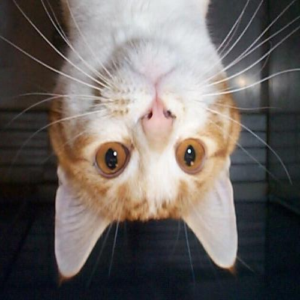

Class name is 0


In [25]:

item = dataset[0]
print('1st item is a pair', item)

# Display the PIL image and the class name directly.
display(item[0])
# print('Class name is', val_set.classes[item[1]])
print('Class name is', item[1])

#### Custom Transforms

In [1]:
from operator import mul
from functools import reduce

#Image Transform 
class Flatten:
    def __init__(self,target_input, is_rgb= False) -> None:
        self.target_input = target_input
        self.is_rgb = is_rgb
    def __call__(self, img):        
        return img.reshape(-1, reduce(mul,self.target_input))

    def __repr__(self) -> str:
        return f"{self.__class__.__name__}()"

#Lable Transform
class ToCategorical:
    def __init__(self, max_classes, target_device) -> None:
        self.max_classes = max_classes
        self.target_device = target_device

    def __call__(self, lable):
        lable = int(lable)
        categorical = torch.zeros(self.max_classes)
        if lable > self.max_classes:
            raise f'Provided {lable} maps out of class range as max classes are {self.max_classes}'
        categorical[lable] = 1
        return categorical[None,:].to(self.target_device)

    def __repr__(self) -> str:
        return f"{self.__class__.__name__}()"

### Build Model

Dense Neural Network

In [6]:
from torch import nn
from torch.nn import functional as F
class CAT_DOG_MODEL(nn.Module):
    def __init__(self, in_size=9000, out_size=1, hidden_size=5, hidden_layers=2, device=0):
        super(CAT_DOG_MODEL, self).__init__()
        self.layers = nn.Sequential(
			nn.Linear(in_size, hidden_size, device=device),
			nn.ReLU(),
			*[nn.Sequential(nn.Linear(hidden_size, hidden_size, device=device), nn.LeakyReLU()) for _ in range(hidden_layers)],
			nn.Linear(hidden_size, out_size, device=device),
		)
        self.device = device
    
    def forward(self, x):
        return self.layers(x)

#### Train

In [7]:
import os
import torch
from torch import optim
from tqdm import tqdm
import torchvision
class Train_Cat_DOG():
    def __init__(
            self,
            train_set,
            val_set,            
            in_shape=(300,300), 
            batch_size=32,
            out_size=1, 
            hidden_size=5, 
            hidden_layers=2,
            sched_step=300,
            save_path='./model_zoo',
            device=0
        ) -> None:
        
        # data Transformation
        self.train_transform = torchvision.transforms.Compose([
                # Randomly Flip Image
                torchvision.transforms.RandomHorizontalFlip(),
                torchvision.transforms.RandomVerticalFlip(),
                # Resize Image to Standard Format
                torchvision.transforms.Resize(in_shape),
                # Convert to gray Scale
                torchvision.transforms.Grayscale(),
                # Convert Data To tensor form
                torchvision.transforms.ToTensor(),
                # Normalize data to Zero Mean 
                torchvision.transforms.Normalize(
                    mean=[0.4572],
                    std=[0.0197]
                ),
                Flatten(in_shape),
            ])
        self.val_transform = torchvision.transforms.Compose([
                # Resize Image to Standard Format
                torchvision.transforms.Resize(in_shape),
                # Convert to gray Scale
                torchvision.transforms.Grayscale(),
                # Convert Data To tensor form
                torchvision.transforms.ToTensor(),
                # Normalize data to Average Mean
                torchvision.transforms.Normalize(
                    mean=[0.4659],
                    std=[0.0222]
                ),
                Flatten(in_shape),
            ])
        
        #Lable Transform
        self.target_transform = torchvision.transforms.Compose([
                # Convert Data to categorical form
                # i.e cat: 0 => [1,0], dog: 1 => [0,1]
                ToCategorical(2, target_device=device),
            ])
        self.batch_size = batch_size
        ## Training Data Loader
        self.train_set =  torchvision.datasets.ImageFolder(
            train_set,
            transform=self.train_transform,
            target_transform=self.target_transform
        )
        ## Validatin Data Loader
        self.val_set =  torchvision.datasets.ImageFolder(
            val_set,
            transform=self.val_transform, 
            target_transform=self.target_transform
        )
        
        ## Model
        self.net = CAT_DOG_MODEL(
                    in_shape[0]*in_shape[1],
                    out_size,
                    hidden_size,
                    hidden_layers,
                    device=device
                )
        
        self.criteron = nn.CrossEntropyLoss()
        self.sched_step = sched_step
        self.save_path = save_path
        if not os.path.exists(self.save_path):
            os.makedirs(self.save_path, exist_ok=True)
        self.device = device
        self.in_shape = in_shape
        
    def train(self, epochs=10, start_epoch=0,lr=0.001, eval_duration=5, save_duration=5, resume=None):
        self.optimizer = optim.Adam(self.net.parameters(), lr=lr)    
            # criteron = lambda x, y: torch.mean(torch.abs(x - y))
            
        self.scheduler = optim.lr_scheduler.StepLR(self.optimizer, step_size=self.sched_step, gamma=0.5)
        if resume:
            pass
        bset_running_loss = 1e100
        bset_val_loss = 1e100
        for epoch in range(start_epoch,epochs,1):
            
            # Train Step
            running_loss = self.train_step(
                epoch
            )
            if running_loss < bset_running_loss:
                bset_running_loss = running_loss 
                self.save_state(
                    epochs, 
                    epoch,
                    self.batch_size,
                    eval_duration,
                    running_loss,
                    name='best.pt'
                )
            if epoch%save_duration==0:
                self.save_state(
                    epochs, 
                    epoch,
                    self.batch_size,
                    eval_duration,
                    running_loss
                )
            if epoch%eval_duration == 0:
                loss = self.eval_step(
                    epoch
                )
        # self.eval_step(
        #     epoch
        # )
    def train_step(self, epoch):
        self.net.train()
        running_loss = self.process_step(self.train_set)
        print('Train Epoch: {}, Loss: {:.10f}'.format(epoch, running_loss))
        self.scheduler.step()
        return running_loss
    @torch.no_grad()
    def eval_step(self, epoch):
        self.net.train(False)  
        running_loss = self.process_step(self.val_set)
        print('Val Epoch: {}, Loss: {:.10f}'.format(epoch, running_loss))
        return running_loss
    
    def process_step(self, set):
        is_training = self.net.training
        running_loss = []
        for inputs, labels in tqdm(set):
            # label transform
            # labels = torch.tensor([labels], dtype=torch.float32)[None,:]
            # Forward pass
            inputs = inputs.to(self.device)
            outputs = self.net(inputs)
            # compute average absolute difference between outputs and labels
            loss = self.criteron(outputs, labels)
            # loss = self.criteron(outputs.softmax(0), labels)
            if is_training:
                # Backward pass and optimization
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()
            running_loss.append(loss.item())
        return sum(running_loss)/len(running_loss)
    
    def save_state(self, epochs, start_epoch, batch_size, eval_duration, running_loss, name=''):
        state = {
            'net':self.net.state_dict(),
            'optimizer':self.optimizer.state_dict(),
            'lr_sec':self.scheduler.state_dict(),
            'save_dir':self.save_path,
            'epochs':epochs,
            'start_epoch':start_epoch,
            'batch_size':batch_size,
            'device':self.device,
            'eval_duration':eval_duration,
            'loss':running_loss
        }
        torch.save(
            state,
            os.path.join(self.save_path, name if name else f'Epoch_{str(start_epoch).zfill(4)}.pth')
        )
    def load_state(self):
        pass  

In [8]:
trainer = Train_Cat_DOG(
            'res/dataset_dir/cat_dog/train',
            'res/dataset_dir/cat_dog/val',
            in_shape=(600,600),
            batch_size=32,
            out_size=2, 
            hidden_size=32, 
            hidden_layers=5,
            sched_step=10,
            save_path='./model_zoo',
            device=0
            )

In [9]:
trainer.train(
    10,0,save_duration=1
)

100%|██████████| 1187/1187 [00:11<00:00, 107.29it/s]


Train Epoch: 0, Loss: 0.4017460722


100%|██████████| 323/323 [00:01<00:00, 245.84it/s]


Val Epoch: 0, Loss: 143.5126978635


100%|██████████| 1187/1187 [00:10<00:00, 114.70it/s]


Train Epoch: 1, Loss: 2.1102780801


100%|██████████| 1187/1187 [00:10<00:00, 116.16it/s]


Train Epoch: 2, Loss: 2.0828398003


100%|██████████| 1187/1187 [00:10<00:00, 118.30it/s]


Train Epoch: 3, Loss: 1.6911637612


100%|██████████| 1187/1187 [00:10<00:00, 118.54it/s]


Train Epoch: 4, Loss: 0.3982078302


100%|██████████| 1187/1187 [00:10<00:00, 115.94it/s]


Train Epoch: 5, Loss: 0.2644420527


100%|██████████| 323/323 [00:01<00:00, 245.66it/s]


Val Epoch: 5, Loss: 16.6012107267


100%|██████████| 1187/1187 [00:10<00:00, 117.61it/s]


Train Epoch: 6, Loss: 0.3283369678


100%|██████████| 1187/1187 [00:10<00:00, 117.20it/s]


Train Epoch: 7, Loss: 0.3315283075


100%|██████████| 1187/1187 [00:10<00:00, 117.36it/s]


Train Epoch: 8, Loss: 0.3064847097


100%|██████████| 1187/1187 [00:10<00:00, 115.52it/s]


Train Epoch: 9, Loss: 0.4758739705


100%|██████████| 323/323 [00:01<00:00, 246.38it/s]

Val Epoch: 9, Loss: 15.3635604610


#### Inference 

In [31]:
import torch
ckpt = torch.load('model_zoo/best.pt')['net']
trainer.net.load_state_dict(ckpt)
trainer.net = trainer.net.train(False)

In [42]:
image, lable = trainer.train_set[-1]
pred = trainer.net(image.to(trainer.net.device))

In [43]:
pred, lable

(tensor([[-23.5380,  33.3939]], device='cuda:0', grad_fn=<AddmmBackward0>),
 tensor([[1., 0.]], device='cuda:0'))

## Save and load model 💾

## Tips and Advance concepts 👇

# Masked Auto Encoder 

In [ ]:
import sys
import os
import requests

import torch
import numpy as np

import matplotlib.pyplot as plt
from PIL import Image

# check whether run in Colab
if 'google.colab' in sys.modules:
    print('Running in Colab.')
    !pip3 install timm==0.4.5  # 0.3.2 does not work in Colab
    !git clone https://github.com/facebookresearch/mae.git
    sys.path.append('./mae')
else:
    sys.path.append('..')
import models_mae

### Utils

In [ ]:
# define the utils

imagenet_mean = np.array([0.485, 0.456, 0.406])
imagenet_std = np.array([0.229, 0.224, 0.225])

def show_image(image, title=''):
    # image is [H, W, 3]
    assert image.shape[2] == 3
    plt.imshow(torch.clip((image * imagenet_std + imagenet_mean) * 255, 0, 255).int())
    plt.title(title, fontsize=16)
    plt.axis('off')
    return

def prepare_model(chkpt_dir, arch='mae_vit_large_patch16'):
    # build model
    model = getattr(models_mae, arch)()
    # load model
    checkpoint = torch.load(chkpt_dir, map_location='cpu')
    msg = model.load_state_dict(checkpoint['model'], strict=False)
    print(msg)
    return model

def run_one_image(img, model):
    x = torch.tensor(img)

    # make it a batch-like
    x = x.unsqueeze(dim=0)
    x = torch.einsum('nhwc->nchw', x)

    # run MAE
    loss, y, mask = model(x.float(), mask_ratio=0.75)
    y = model.unpatchify(y)
    y = torch.einsum('nchw->nhwc', y).detach().cpu()

    # visualize the mask
    mask = mask.detach()
    mask = mask.unsqueeze(-1).repeat(1, 1, model.patch_embed.patch_size[0]**2 *3)  # (N, H*W, p*p*3)
    mask = model.unpatchify(mask)  # 1 is removing, 0 is keeping
    mask = torch.einsum('nchw->nhwc', mask).detach().cpu()

    x = torch.einsum('nchw->nhwc', x)

    # masked image
    im_masked = x * (1 - mask)

    # MAE reconstruction pasted with visible patches
    im_paste = x * (1 - mask) + y * mask

    # make the plt figure larger
    plt.rcParams['figure.figsize'] = [24, 24]

    plt.subplot(1, 4, 1)
    show_image(x[0], "original")

    plt.subplot(1, 4, 2)
    show_image(im_masked[0], "masked")

    plt.subplot(1, 4, 3)
    show_image(y[0], "reconstruction")

    plt.subplot(1, 4, 4)
    show_image(im_paste[0], "reconstruction + visible")

    plt.show()

In [ ]:
# load an image
img_url = 'https://user-images.githubusercontent.com/11435359/147738734-196fd92f-9260-48d5-ba7e-bf103d29364d.jpg' # fox, from ILSVRC2012_val_00046145
# img_url = 'https://user-images.githubusercontent.com/11435359/147743081-0428eecf-89e5-4e07-8da5-a30fd73cc0ba.jpg' # cucumber, from ILSVRC2012_val_00047851
img = Image.open(requests.get(img_url, stream=True).raw)
img = img.resize((224, 224))
img = np.array(img) / 255.

assert img.shape == (224, 224, 3)

# normalize by ImageNet mean and std
img = img - imagenet_mean
img = img / imagenet_std

plt.rcParams['figure.figsize'] = [5, 5]
show_image(torch.tensor(img))

########################
## LOAD MODEL
########################
# This is an MAE model trained with pixels as targets for visualization (ViT-Large, training mask ratio=0.75)

# download checkpoint if not exist
!wget -nc https://dl.fbaipublicfiles.com/mae/visualize/mae_visualize_vit_large.pth

chkpt_dir = 'mae_visualize_vit_large.pth'
model_mae = prepare_model(chkpt_dir, 'mae_vit_large_patch16')
print('Model loaded.')

In [ ]:
# make random mask reproducible (comment out to make it change)
torch.manual_seed(2)
print('MAE with pixel reconstruction:')
run_one_image(img, model_mae)

# Save and Close

In [ ]:
%%javascript
IPython.notebook.save_checkpoint();
window.onbeforeunload = null
window.close();
IPython.notebook.session.delete();